In [1]:
# import xgeboost 
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import DataFarme
df = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/clean_gde.csv", index_col="Unnamed: 0")

# print head of DataFrame
print("After Reading Data")
display(df.head(2))

# Create Dummies variable for type
df = pd.get_dummies(df, columns = ["type"])
print("After creating Dummies")
display(df.head(2))

# Select all numerical features and target variable from df
df_num = df.select_dtypes(include=np.number)
print("After Selecting Numerical Features")
display(df_num.head(2))

# drop columns with more than 10% missing values
df_num = df_num.dropna(thresh=len(df_num)*0.9, axis=1)
print("After Dropping Columns with more than 10% missing values")
print(df_num.shape)

# drop na values
df_num = df_num.dropna()
print("After Dropping NA")
print(df_num.shape)
print("Number of Na Value in Df", sum(df_num.isna().sum()))

# split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_num.drop("price", axis=1), df_num["price"], test_size=0.2, random_state=42)

# Display the X_train, X_test, y_train, y_test
print("X_train")
display(X_train.head(2))
print("X_test")
display(X_test.head(2))
print("y_train")
display(y_train.head(2))
print("y_test")
display(y_test.head(2))



After Reading Data


,living_space,rooms,plot_area,floor_space,floor,availability,price,municipality,street,street_nr,...,gde_pop_per_km2,gde_population,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,type
0,100.0,3.5,NaN,NaN,4.0,On request,1150000.0,Biberstein,NaN,NaN,...,376.829268,1545.0,686.0,2.234259,5.89,14.0,9.0,308.0,331.0,penthouse
1,156.0,4.5,222.0,242.0,NaN,On request,1420000.0,Biberstein,Buhldenstrasse,8d,...,376.829268,1545.0,686.0,2.234259,5.89,14.0,9.0,308.0,331.0,terrace-house


After creating Dummies


,living_space,rooms,plot_area,floor_space,floor,availability,price,municipality,street,street_nr,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,100.0,3.5,NaN,NaN,4.0,On request,1150000.0,Biberstein,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
1,156.0,4.5,222.0,242.0,NaN,On request,1420000.0,Biberstein,Buhldenstrasse,8d,...,0,0,0,0,0,0,0,0,1,0


After Selecting Numerical Features


,living_space,rooms,plot_area,floor_space,floor,price,zip_code,ForestDensityL,ForestDensityM,ForestDensityS,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,100.0,3.5,NaN,NaN,4.0,1150000.0,5023,0.511176,0.286451,0.090908,...,1,0,0,0,0,0,0,0,0,0
1,156.0,4.5,222.0,242.0,NaN,1420000.0,5023,0.511176,0.286451,0.090908,...,0,0,0,0,0,0,0,0,1,0


After Dropping Columns with more than 10% missing values
(13069, 69)
After Dropping NA
(10402, 69)
Number of Na Value in Df 0
X_train


,living_space,rooms,zip_code,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
6880,76.0,2.5,6528,0.072777,0.055631,0.091586,46.167327,9.005004,0.057474,0.025979,...,0,0,0,0,0,0,0,0,0,0
502,136.0,5.5,5736,0.089293,0.001564,0.000000,47.238684,8.180930,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0


X_test


,living_space,rooms,zip_code,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
10951,199.0,5.5,1272,0.093278,0.092806,0.031711,46.435898,6.214673,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10298,175.0,5.5,1005,0.024808,0.028412,0.000000,46.522587,6.635715,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


y_train


6880    435000.0
502     685000.0
Name: price, dtype: float64

y_test


10951    2690000.0
10298    1920000.0
Name: price, dtype: float64

---
# Xgboost Model

In [87]:
# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Use XGBoost to train the model
params = {
    "objective": "reg:squarederror",
    "max_depth": 5,
    "learning_rate": 0.05,
    "subsample": 0.7,
    "colsample_bytree": 0.5,
    "alpha": 0.1,
    "lambda": 0.1,
    "eval_metric": "mape",
    "seed": 42,
}


# Train model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Predict on test set
preds = model.predict(dtest)

# get xgb R2 score model
from sklearn.metrics import r2_score
print("r2_score:", r2_score(y_test, preds))

# get xgb MAPE score model
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE score:", mean_absolute_percentage_error(y_test, preds))


r2_score: 0.7763811178181508
MAPE score: 0.43647694557726086


----
# Optimizing Hyperparamater Xgboost

C:\Users\Si Ben Tran\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best MAE: 0.710 using {'subsample': 0.7, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.306988 (0.028579) with: {'subsample': 0.7, 'max_depth': 3, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.304201 (0.024589) with: {'subsample': 0.8, 'max_depth': 3, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.375446 (0.038702) with: {'subsample': 0.7, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.372060 (0.036457) with: {'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.659283 (0.040038) with: {'subsample': 0.7, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.651409 (0.045582) with: {'subsample': 0.8, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.710342 (0.052208) with: {'subsample'

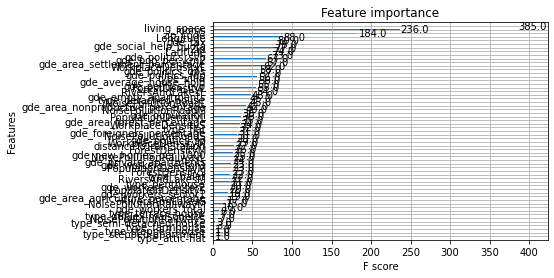

In [88]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# define model
model = xgb.XGBRegressor()

# define grid
param_grid = {
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.5, 0.7],
    "alpha": [0.1, 0.3],
    "lambda": [0.1, 0.3],
}

# define evaluation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# define search
search = RandomizedSearchCV(model, param_grid, scoring="r2", n_iter=100, cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train, y_train)

# summarize
print("Best MAE: %.3f using %s" % (results.best_score_, results.best_params_))

# summarize all
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params = results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# get best model
best_model = results.best_estimator_

# predict on test set
yhat = best_model.predict(X_test)

# get best model R2 score
print("r2_score:", r2_score(y_test, yhat))

# get best model MAPE score
print("MAPE score:", mean_absolute_percentage_error(y_test, yhat))

# plot feature importance
xgb.plot_importance(best_model)
plt.show()
